<a href="https://www.kaggle.com/code/chibuzornwachukwu/tmdb-dataset?scriptVersionId=100374422" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# Project: TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis(EDA)</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Overview and Description 

>In this project, we'll be analysing metadata on 5,000 movies from TMDB(The Movie Database). Here we dive right into and explore the title, release dates, budgets of, taglines, revenue generated on over a thousand films and lots more. 

>There are over 10 columns present in this set such as tagline, director, imdb_id, revenue, budget, vote_count etc.

### Questions for Data Analysis

>Which movies made the most profits respectively?

>Which movies were the longest?

>How long were the highest grossing movies?

>Which movies generated the most and least earned revenue respectively?

>Which movies were the highest scoring?

>What is the relationship between movie duration and votes?

>How does popularity affect votes and performances?

>How have top scoring movies related with movie duration over the years?

>Does budget really influence movie ratings and performance?

>How has movie costing increased over the years?

#### Importing our libraries

In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling





In [2]:
df= pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [3]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [4]:
df.shape

(4803, 20)

##### Since there is no standard currency stated in the data set, so I'll be using '₦' to represent the Nigerian naira(NGN)


## Data Cleaning


#### Removing unecessary colunms.

In [5]:
del_col=[ 'id', 'tagline','homepage', 'keywords', 'spoken_languages', 'original_language','original_title', 'overview', 'production_companies', 'tagline','vote_count']
df= df.drop(del_col,1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [6]:
df.head(4)

,budget,genres,popularity,production_countries,release_date,revenue,runtime,status,title,vote_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Avatar,7.2
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,Spectre,6.3
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6


In [7]:
df.shape

(4803, 10)

#### Checking data types and null count

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   popularity            4803 non-null   float64
 3   production_countries  4803 non-null   object 
 4   release_date          4802 non-null   object 
 5   revenue               4803 non-null   int64  
 6   runtime               4801 non-null   float64
 7   status                4803 non-null   object 
 8   title                 4803 non-null   object 
 9   vote_average          4803 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 375.4+ KB


#### Checking for null values

In [9]:
df.isna().sum()

budget                  0
genres                  0
popularity              0
production_countries    0
release_date            1
revenue                 0
runtime                 2
status                  0
title                   0
vote_average            0
dtype: int64

#### Dropping null fields

In [10]:
df.dropna(inplace = True)

In [11]:
df.shape

(4800, 10)

In [12]:
df.isnull().sum()

budget                  0
genres                  0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
status                  0
title                   0
vote_average            0
dtype: int64

#### Checking for duplicates

In [13]:
df.duplicated().sum()

0

#### Dropping duplicates

In [14]:
df.drop_duplicates(inplace= True)

In [15]:
df.shape

(4800, 10)

#### Changing the release date column into standard date format

In [16]:
df.release_date = pd.to_datetime(df['release_date'])

In [17]:
df.head(3)

,budget,genres,popularity,production_countries,release_date,revenue,runtime,status,title,vote_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Avatar,7.2
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,Spectre,6.3


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4800 non-null   int64         
 1   genres                4800 non-null   object        
 2   popularity            4800 non-null   float64       
 3   production_countries  4800 non-null   object        
 4   release_date          4800 non-null   datetime64[ns]
 5   revenue               4800 non-null   int64         
 6   runtime               4800 non-null   float64       
 7   status                4800 non-null   object        
 8   title                 4800 non-null   object        
 9   vote_average          4800 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 412.5+ KB


#### Changing format of budget and revenue column from float to int type

In [19]:
change_type=['budget', 'revenue']
df[change_type]=df[change_type].applymap(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4800 non-null   int64         
 1   genres                4800 non-null   object        
 2   popularity            4800 non-null   float64       
 3   production_countries  4800 non-null   object        
 4   release_date          4800 non-null   datetime64[ns]
 5   revenue               4800 non-null   int64         
 6   runtime               4800 non-null   float64       
 7   status                4800 non-null   object        
 8   title                 4800 non-null   object        
 9   vote_average          4800 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 412.5+ KB


#### Removing all rows with 0 in both budget and revenue columns respectively

In [20]:
temp_list=['budget', 'revenue']

#this replaces all the value from '0' to NAN in the list
df[temp_list] = df[temp_list].replace(0, np.NAN)

#Removing all the rows with NaN value in temp_list 
df.dropna(subset = temp_list, inplace = True)

In [21]:
df.shape

(3229, 10)

#### Creating a new column for profit

In [22]:
budget = df['budget']
revenue = df['revenue']

df.insert(2,'profit_earned',revenue-budget)

#### Changing the index from 0 to 1

In [23]:
df.index = np.arange(1, len(df) + 1)
df.head(3)

,budget,genres,profit_earned,popularity,production_countries,release_date,revenue,runtime,status,title,vote_average
1,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2.550965e+09,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,Released,Avatar,7.2
2,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",6.610000e+08,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,Released,Pirates of the Caribbean: At World's End,6.9
3,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.356746e+08,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,Released,Spectre,6.3


<a id='eda'></a>
## Exploratory Data Analysis(EDA)




In [24]:
df.describe()

,budget,profit_earned,popularity,revenue,runtime,vote_average
count,3.229000e+03,3.229000e+03,3229.000000,3.229000e+03,3229.000000,3229.000000
mean,4.065444e+07,8.058851e+07,29.033689,1.212430e+08,110.724373,6.309353
std,4.439674e+07,1.581479e+08,36.165730,1.863029e+08,20.965694,0.873891
min,1.000000e+00,-1.657101e+08,0.019984,5.000000e+00,41.000000,0.000000
25%,1.050000e+07,2.113940e+05,10.446722,1.700000e+07,96.000000,5.800000
50%,2.500000e+07,2.616557e+07,20.410354,5.518472e+07,107.000000,6.300000
75%,5.500000e+07,9.748982e+07,37.335721,1.462920e+08,121.000000,6.900000
max,3.800000e+08,2.550965e+09,875.581305,2.787965e+09,338.000000,8.500000


In [25]:
max_runtime = df['runtime'].max()
print(f'The max runtime of movies is {max_runtime} minutes')

The max runtime of movies is 338.0 minutes


In [26]:
min_runtime = df['runtime'].min()
print(f'The minimum runtime of movies is {min_runtime} minutes')

The minimum runtime of movies is 41.0 minutes


#### Which movies made the most profits respectively?

In [27]:
top_five_in_profits = df.nlargest(5, ['profit_earned'])
top_five_in_profits

,budget,genres,profit_earned,popularity,production_countries,release_date,revenue,runtime,status,title,vote_average
1,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2.550965e+09,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,Released,Avatar,7.2
26,200000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",1.645034e+09,100.025899,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-11-18,1.845034e+09,194.0,Released,Titanic,7.5
29,150000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",1.363529e+09,418.708552,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-09,1.513529e+09,124.0,Released,Jurassic World,6.5
45,190000000.0,"[{""id"": 28, ""name"": ""Action""}]",1.316249e+09,102.322217,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",2015-04-01,1.506249e+09,137.0,Released,Furious 7,7.3
17,220000000.0,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",1.299558e+09,144.448633,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-25,1.519558e+09,143.0,Released,The Avengers,7.4


#### Which movies were the longest?

In [28]:
longest_movies = df.nlargest(5, ['runtime'])
longest_movies

,budget,genres,profit_earned,popularity,production_countries,release_date,revenue,runtime,status,title,vote_average
2035,18000000.0,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",-17128721.0,1.138383,"[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2010-05-19,871279.0,338.0,Released,Carlos,6.7
1048,31115000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",39885000.0,13.244365,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1963-06-12,71000000.0,248.0,Released,Cleopatra,6.7
2881,4000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",396176459.0,48.982550,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1939-12-15,400176459.0,238.0,Released,Gone with the Wind,7.7
3159,600000.0,"[{""id"": 36, ""name"": ""History""}, {""id"": 99, ""na...",33905110.0,3.409764,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1970-03-26,34505110.0,225.0,Released,Woodstock,7.1
1033,44000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",-40515669.0,5.380124,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1980-11-19,3484331.0,219.0,Released,Heaven's Gate,6.4


#### Display of the runtime of all movies in the dataset

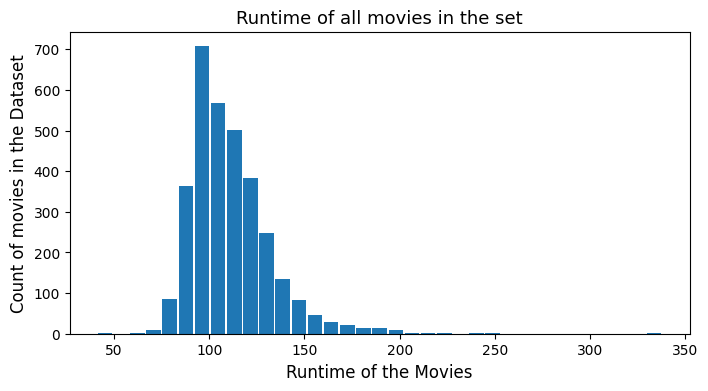

In [29]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(8,4), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 12)
#On y-axis 
plt.ylabel('Count of movies in the Dataset', fontsize=12)
#Name of the graph
plt.title('Runtime of all movies in the set', fontsize=13)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

#### Function for line plotter

In [30]:
def line_plotter(x_axis,y_axis):
    plotter_var = df.groupby(x_axis)[y_axis].sum()
    #figure size(width, height)
    plt.figure(figsize=(10,6))

    #x-axis
    plt.xlabel(x_axis, fontsize = 12)
    #y-axis
    plt.ylabel(y_axis, fontsize = 12)
    #title
    plt.title(f'Total {y_axis} by all movies vs {x_axis} of the movies.')

    #plotting the graph
    plt.plot(plotter_var)

    #displaying the line plot
    plt.show()

#### How long were the highest grossing movies?

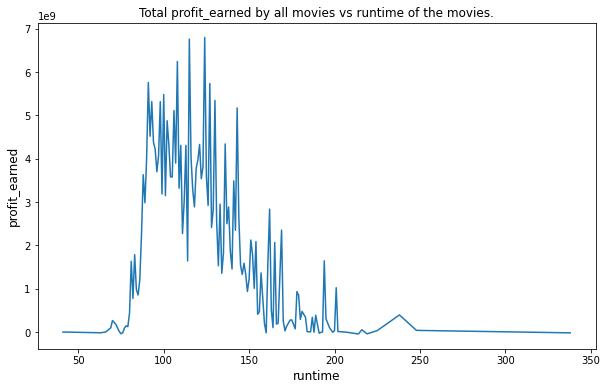

In [31]:
line_plotter('runtime', 'profit_earned')


#### Which movies generated the most and least earned revenue respectively?

In [32]:
most_revenue = df.nlargest(1,'revenue')
most_revenue

,budget,genres,profit_earned,popularity,production_countries,release_date,revenue,runtime,status,title,vote_average
1,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2.550965e+09,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,Released,Avatar,7.2


In [33]:
least_revenue = df.nsmallest(1,'revenue')
least_revenue

,budget,genres,profit_earned,popularity,production_countries,release_date,revenue,runtime,status,title,vote_average
2653,7.0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",-2.0,4.857028,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",1992-05-01,5.0,90.0,Released,Split Second,5.7


##### The movie 'Avatar' generated the most revenue; ₦2,781,505,847 while 'Shattered Glass' earned the least; ₦2.

#### The highest scoring movies

In [34]:
vote_average_data = df.nlargest(5, ['vote_average'])
vote_average_data

,budget,genres,profit_earned,popularity,production_countries,release_date,revenue,runtime,status,title,vote_average
1671,25000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",3341469.0,136.747729,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-23,28341469.0,142.0,Released,The Shawshank Redemption,8.5
2429,10500000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",-10376491.0,0.037073,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-02,123509.0,99.0,Released,There Goes My Baby,8.5
2631,6000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",239066411.0,143.659698,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-14,245066411.0,175.0,Released,The Godfather,8.4
637,63000000.0,"[{""id"": 18, ""name"": ""Drama""}]",37853753.0,146.757391,"[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",1999-10-15,100853753.0,139.0,Released,Fight Club,8.3
1618,22000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",299365567.0,104.469351,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1993-11-29,321365567.0,195.0,Released,Schindler's List,8.3


#### Relationship between movie duration and votes

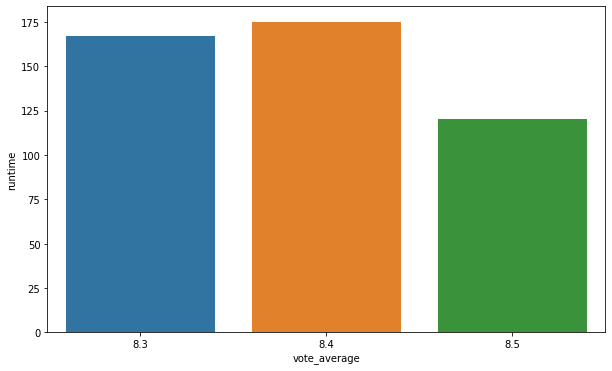

In [35]:
highest_votes = df.nlargest(5, ['vote_average'])
plt.figure(figsize=(10,6))
sns.barplot(x = 'vote_average', y = 'runtime',  data = highest_votes, ci=None)
plt.show()

#### What is the average profit generated by movies in the dataset?

In [36]:
average_profit_earned = int(df['profit_earned'].mean())
print(f'The average profit earned by movies in the dataset is ₦{average_profit_earned}')

The average profit earned by movies in the dataset is ₦80588512


#### How does popularity affect votes and performances?

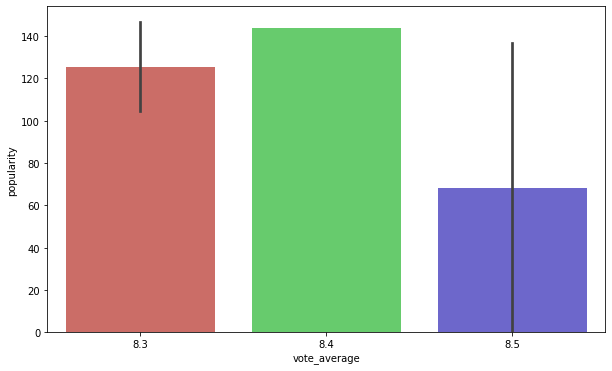

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'vote_average', y = 'popularity', data = highest_votes, palette='hls')
plt.show()

#### Does budget really affect movie ratings?

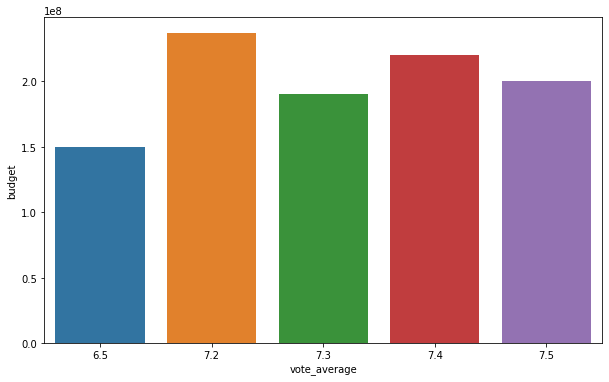

In [38]:
highest_votes = df.nlargest(5, ['vote_average'])
plt.figure(figsize=(10,6))
sns.barplot(x = 'vote_average', y = 'budget',  data = top_five_in_profits)
plt.show()

#### How has movie costing increased over the years?

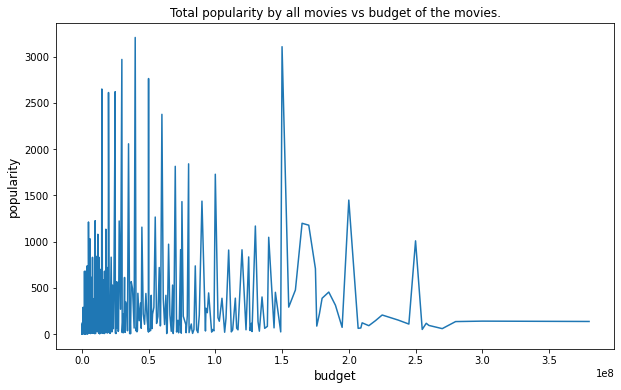

In [39]:
line_plotter('budget', 'popularity')

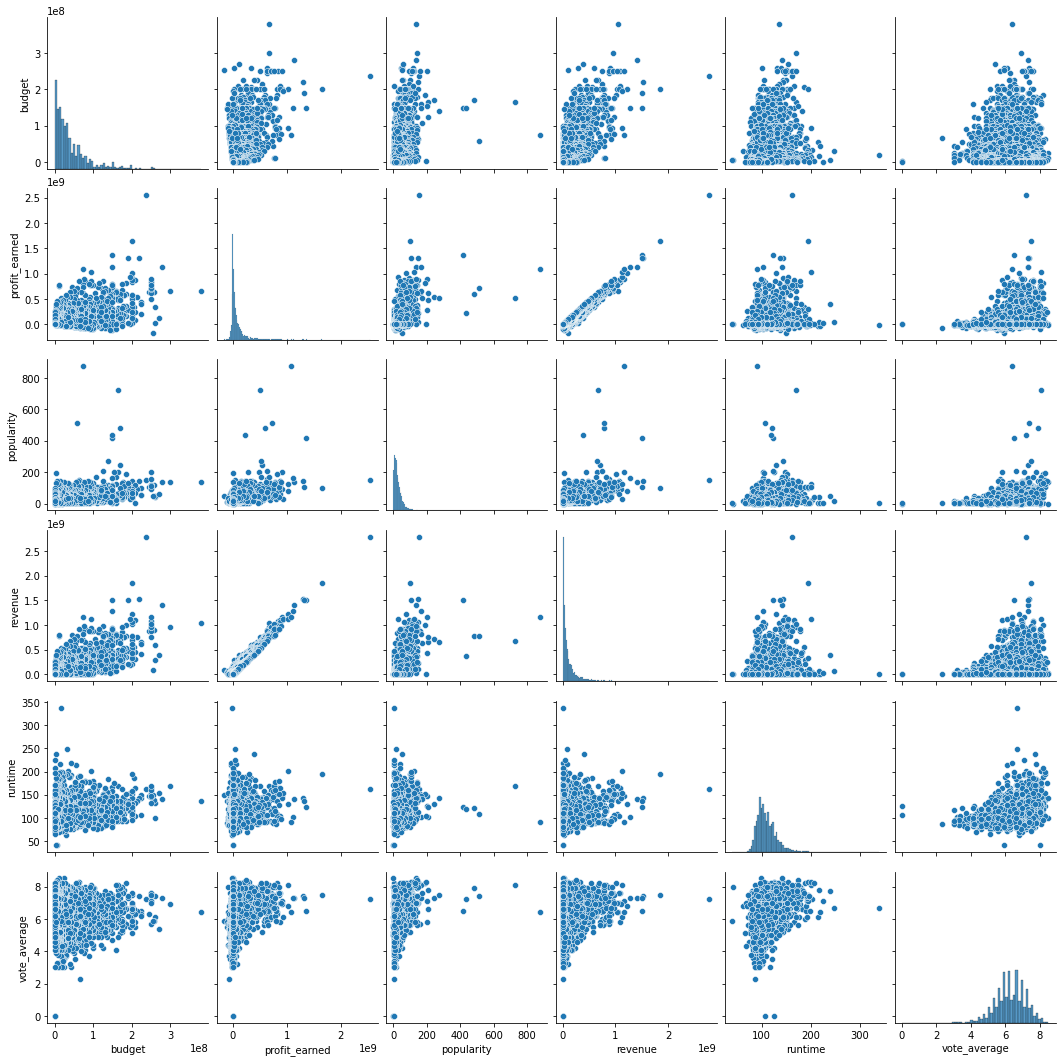

In [40]:
sns.pairplot(df)
plt.show()

<a id='conclusions'></a>
## Conclusions

After thorough analysis,  we can conclude that 
> Most movies are just about 100 minutes long

> For a movie to really gross highly; 
> 1. it should be Action themed.
> 2. it must be around 110 minutes long.

> Movies around 2hrs keep viewers entertained the most

> Budget does not really affect/influence movie performance

> Amount of profit accumulated from movie production has risen astronomically since 1970.

> Costing and budgets have increased a lot since 1970

Using these pro tips, movie companies can secure top charts and take the best profits.

## Limitations in this analysis
>This analysis was done on thousands of movies, some of these columns and cells contianed null values and dropping these rows affected the overall analysis.
It could also have helped if a currency was specified for all  the columns conveying monetary value

